DEMO: LINEAR REGRESSION 

In [15]:
#import request libraries 
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

DATA LOADING AND VISUALIZATION 

In [19]:
# Read data from file
df = pd.read_csv('https://static.bc-edx.com/ai/ail-v-1-0/m12/lesson_3/datasets/beijing-pm2-5-NE.csv')


# Display sample data from the dataset
df.head()


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,19,2010,1,1,18,NaN,-18,-5.0,1016.0,NE,1.79,0,0
1,102,2010,1,5,5,28.0,-27,-16.0,1034.0,NE,4.92,0,0
2,103,2010,1,5,6,27.0,-26,-16.0,1035.0,NE,8.05,0,0
3,104,2010,1,5,7,27.0,-27,-16.0,1034.0,NE,13.86,0,0
4,105,2010,1,5,8,27.0,-26,-16.0,1035.0,NE,18.78,0,0


Text(0, 0.5, 'Pressure')

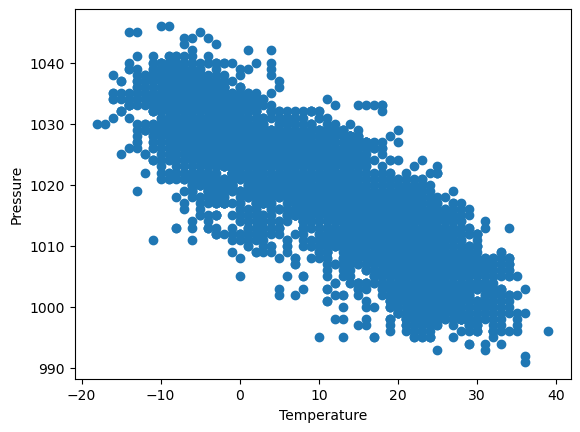

In [20]:
#Create a scatter plot with the data to see the relationship between the two variables
plt.scatter(df['TEMP'], df['PRES'])
plt.xlabel('Temperature')
plt.ylabel('Pressure')

DATA PREPARATION 

In [23]:
# REFORM DATA OF THE INDEPENDENT VARIABLE X AS A SINGLE COLUMN DATAFRAME
#(x= df['column_name'].values.reshape(-1,1))
x = df['TEMP'].values.reshape(-1,1)


In [24]:
# Create an array for the dependent variable y (Y = DF['COLUMN_NAME'])
y= df['PRES']

BUILDING THE LINEAR REGRESSION MODEL 

In [25]:
# Create a model with scikit-learn ( model = LinearRegression() )
lr_model = LinearRegression()

In [36]:
# Fit the data into the model (model.fit(X,y))
lr_model.fit(x,y)


LinearRegression()

In [37]:
#Display the slope and intercept of the model (model.coef_, model.intercept_) , use print()
print(lr_model.coef_, lr_model.intercept_)

#Display the model's best fit line formula (y = mx + b) (print(f"Model's formula: y = {model.intercept_} + {model.coef_[0]}X"))
print(f"Model's formula: y = {lr_model.intercept_} + {lr_model.coef_[0]}X")

[-0.74919858] 1026.0463953682502
Model's formula: y = 1026.0463953682502 + -0.7491985836833904X


In [38]:
# Make predictons with the X set (y_pred = model.predict(X))
y_pred = lr_model.predict(x)

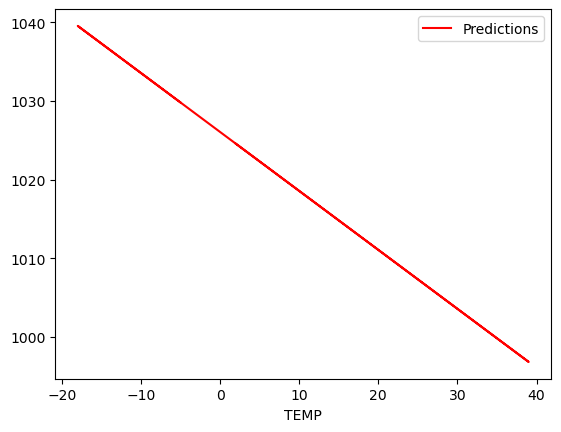

In [39]:
# Create a copy of the original data 
df_copy = df.copy()
# Add a new column to the copy of the original data with the predictions (df_copy['Predictions'] = y_pred)
df_copy['Predictions'] = y_pred
# Create a scatter plot with the original data and the best fit line example : (best_fit_line = df_salary_predicted.plot.line(
#   x = "years_experience",
#   y = "salary_predicted",
#    color = "red"
#)
#best_fit_line)
best_fit_line = df_copy.plot.line(
    x = "TEMP",
    y = "Predictions",
    color = "red"
)

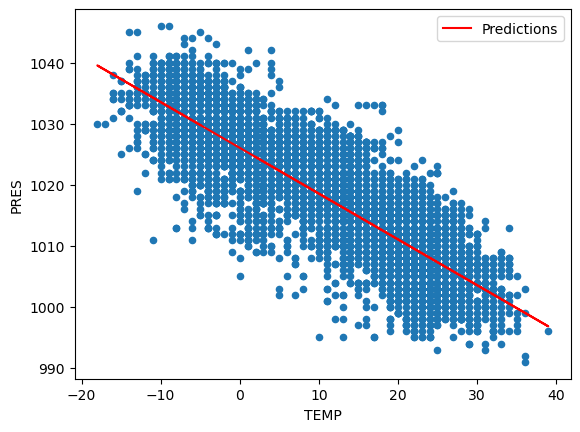

In [43]:
# Plot the fit line and scatter points together (.plot.scatter ; .plot.line)
temperature_pressure = df_copy.plot.scatter(x = "TEMP", y = "PRES")
best_fit_line = df_copy.plot.line(
    x = "TEMP",
    y = "Predictions",
    color = "red",
    ax = temperature_pressure
)



Linear Regression Model Assessment 

In [46]:
# Import relevant metrics - score , r2 , mse, rmse - from Sickit-learn
score = round(lr_model.score(x, y, sample_weight=None),5)
# Compute the metrics for the linear regression ;example: 
# score = round(model.score(X, y, sample_weight=None),5)
# r2 = round(r2_score(y, predicted_y_values),5)
# mse = round(mean_squared_error(y, predicted_y_values),4)
# rmse = round(np.sqrt(mse),4)
r2 = round(r2_score(y, y_pred),5)
mse = round(mean_squared_error(y, y_pred),4)
rmse = round(np.sqrt(mse),4)
print(f"Score: {score}")
print(f"R2: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")


Score: 0.69793
R2: 0.69793
MSE: 35.6362
RMSE: 5.9696


SCIKIT-LEARN ENCODING METHOD 


In [47]:
#Create an instance of OneHotEncoder() ( enc = OneHotEncoder(handle_unknown='ignore')
enc = OneHotEncoder(handle_unknown='ignore')

#Fit the encoder to the data 
enc.fit(df)
#Transform the data with the encoder (enc.transform(data).toarray())
enc.transform(df).toarray()
#Default output is a sparse matrix, convert it to a dataframe (pd.DataFrame(enc.transform(data).toarray()))
pd.DataFrame(enc.transform(df).toarray())



,0,1,2,3,4,5,6,7,8,9,...,6045,6046,6047,6048,6049,6050,6051,6052,6053,6054
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
#Get new feauture names from the encoder (enc.get_feature_names())
enc.get_feature_names_out()

array(['No_19', 'No_102', 'No_103', ..., 'Ir_34', 'Ir_35', 'Ir_36'],
      dtype=object)

In [53]:
# Set up the OneHotEncoder so it will transform to Pandas 
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
ohe.set_output(transform='pandas')
#Fit and transform the OneHotEncoder to the columns to encode (enc.fit_transform(df[['column_name']]).toarray())
df_data_OHE = ohe.fit_transform(df[['TEMP']])
#Display the transformed data   
df_data_OHE

,TEMP_-18.0,TEMP_-17.0,TEMP_-16.0,TEMP_-15.0,TEMP_-14.0,TEMP_-13.0,TEMP_-12.0,TEMP_-11.0,TEMP_-10.0,TEMP_-9.0,...,TEMP_28.0,TEMP_29.0,TEMP_30.0,TEMP_31.0,TEMP_32.0,TEMP_33.0,TEMP_34.0,TEMP_35.0,TEMP_36.0,TEMP_39.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


This is for practising , is not needed  because we already have just numbers and machine learning is able to do the work.

LabelEncoder model

In [54]:
#Create an instance of the label encoder (le = LabelEncoder())
le = LabelEncoder()

# Copy df to a new dataframe (df_encoded = df.copy())
df = df.copy()
# Fit and transform the label encoder for each column to encode ; example ( for column in columns_to_encode: df_encoded[column] = le.fit_transform(df[column])
for column in df.columns:
    df[column] = le.fit_transform(df[column])
# Display the transformed data
df

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,0,0,0,0,18,429,15,13,25,0,2,0,0
1,1,0,0,4,5,27,6,2,44,0,14,0,0
2,2,0,0,4,6,26,7,2,45,0,30,0,0
3,3,0,0,4,7,26,6,2,44,0,57,0,0
4,4,0,0,4,8,26,7,2,45,0,81,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4992,4992,4,11,27,12,68,21,25,28,0,2,0,0
4993,4993,4,11,28,22,163,21,15,24,0,5,0,0
4994,4994,4,11,29,10,24,19,23,30,0,2,0,0
4995,4995,4,11,29,17,62,19,23,28,0,2,0,0


Sklearn train_test_split()

In [59]:
# Use the Sklearn train_test_split() function to split the data into training and testing sets (X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42))
# Use Feauture Selection for X  ( feautures= [' all columns you need'] then X = df[feautures])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
features = ['TEMP']
x = df[features]
x


,TEMP
0,13
1,2
2,2
3,2
4,2
...,...
4992,25
4993,15
4994,23
4995,23


In [60]:
# Now plit the data into training and testing again 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)   

In [65]:
# Find p-value for each feature (import statsmodels.api as sm) and make a plot 
import statsmodels.api as sm
lr = sm.OLS(y_train, x_train).fit()
lr.pvalues.sort_values()

TEMP    0.0
dtype: float64